In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('../Data/df_final.csv',index_col="time")


In [35]:
X = df.drop(columns=['generation solar','generation wind onshore'])
y_solar = df['generation solar']

In [36]:
def split_by_date(X,train_end_date):
    if not isinstance(train_end_date, pd.Timestamp):
        train_end_date = pd.Timestamp(train_end_date)

    # Convert index of X and y to Timestamp objects if they are strings
    if isinstance(X.index[0], str):
        X.index = pd.to_datetime(X.index)
        
    X_train = X[X.index <= train_end_date]
    X_test = X[X.index > train_end_date]
    
    return X_train, X_test

train_end_date = pd.to_datetime('2017-12-31 23:00:00+00:00')
X_train, X_test = split_by_date(X,train_end_date)


In [37]:
y_solar_train, y_solar_test = split_by_date(y_solar, train_end_date)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_solar_train)

RandomForestRegressor(random_state=42)

In [41]:
y_solar_pred = rf.predict(X_test_scaled)

In [45]:
mean_squared_error(y_solar_test, y_solar_pred)

49425.92665240324

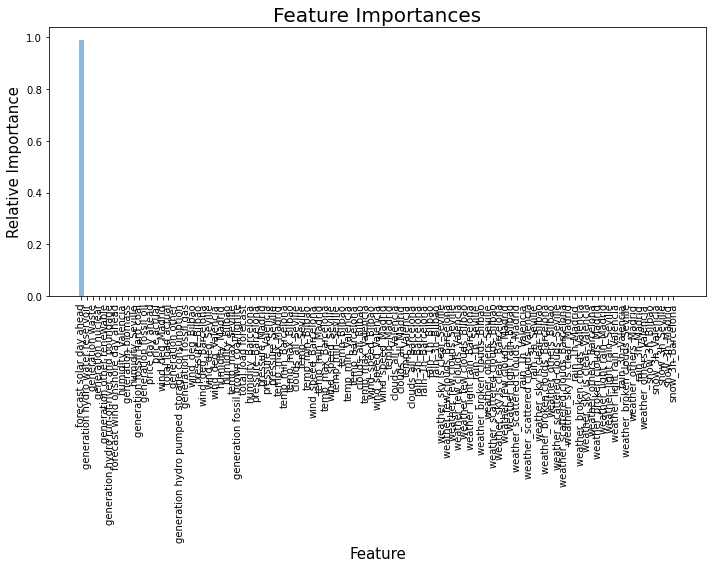

In [46]:
feature_importances = rf.feature_importances_
feature_names = df.drop(['generation solar','generation wind onshore'], axis=1).columns

sorted_indices = np.argsort(feature_importances)[::-1]

# Create the plot
plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices], rotation=90)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()